In [67]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
import scipy.io
from pathlib import Path
import numpy as np

from matplotlib import colors as cm
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker

from datetime import date
import json
from netCDF4 import Dataset as netcdf
import numpy as np
#import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
fname_in = '/net/spica/local/tmp/3/gcambon/CONFIGS/BENGUELA_CPL/croco_files/DATA_ATMO_ERA5/land-sea_mask_era5_benguela_cpl.nc'
nc = netcdf(fname_in,'r+',format='NETCDF4')
time = nc.variables['time'][:]
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
data = nc.variables['lsm'][0,:,:]
nc.close()

In [69]:
np.shape(data)

(101, 105)

In [70]:
#
# Flip latitudes (to have increasing latitudes...)
#
lat = np.flip(lat, axis=0)
data = np.flip(data, axis=0)

In [71]:
print(lat)

[-45.   -44.75 -44.5  -44.25 -44.   -43.75 -43.5  -43.25 -43.   -42.75
 -42.5  -42.25 -42.   -41.75 -41.5  -41.25 -41.   -40.75 -40.5  -40.25
 -40.   -39.75 -39.5  -39.25 -39.   -38.75 -38.5  -38.25 -38.   -37.75
 -37.5  -37.25 -37.   -36.75 -36.5  -36.25 -36.   -35.75 -35.5  -35.25
 -35.   -34.75 -34.5  -34.25 -34.   -33.75 -33.5  -33.25 -33.   -32.75
 -32.5  -32.25 -32.   -31.75 -31.5  -31.25 -31.   -30.75 -30.5  -30.25
 -30.   -29.75 -29.5  -29.25 -29.   -28.75 -28.5  -28.25 -28.   -27.75
 -27.5  -27.25 -27.   -26.75 -26.5  -26.25 -26.   -25.75 -25.5  -25.25
 -25.   -24.75 -24.5  -24.25 -24.   -23.75 -23.5  -23.25 -23.   -22.75
 -22.5  -22.25 -22.   -21.75 -21.5  -21.25 -21.   -20.75 -20.5  -20.25
 -20.  ]


/home/gcambon/miniconda3/envs/mypy37_base/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


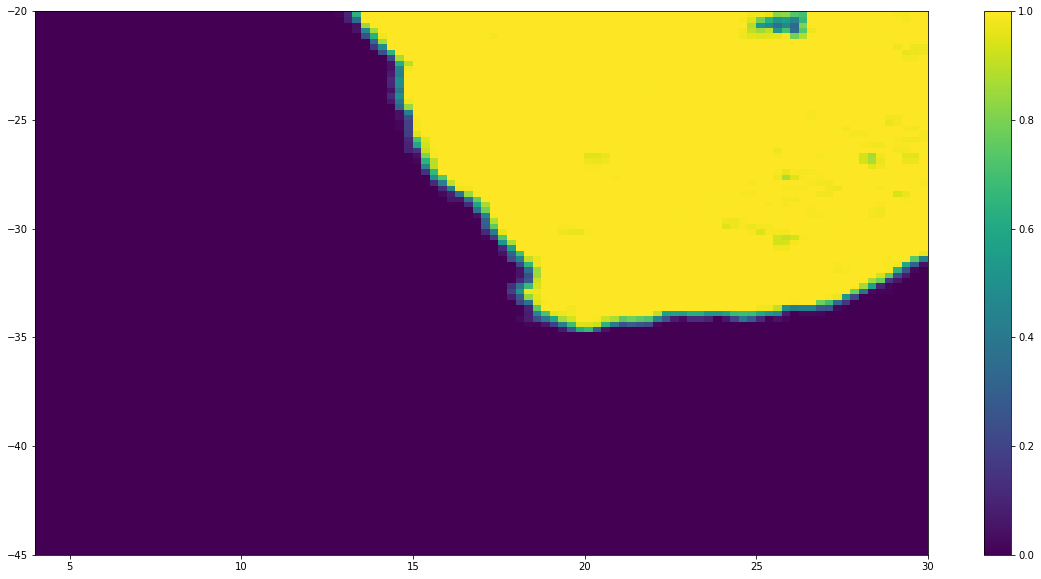

In [72]:
plt.figure(figsize=(20,10))
plt.pcolor(lon,lat,data) ; plt.colorbar()

In [78]:
#
# Missing values and multiply by cff to change unit
#
try:
    mvalue=data.fill_value
except AttributeError:
    print ('No fill value.. use nan')
    mvalue=np.nan
    data=np.array(data)
    data=conv_cff[k]*data
    data[np.where(data==mvalue)]=9999.
    
data[np.where(data != 0)]=1.

/home/gcambon/miniconda3/envs/mypy37_base/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


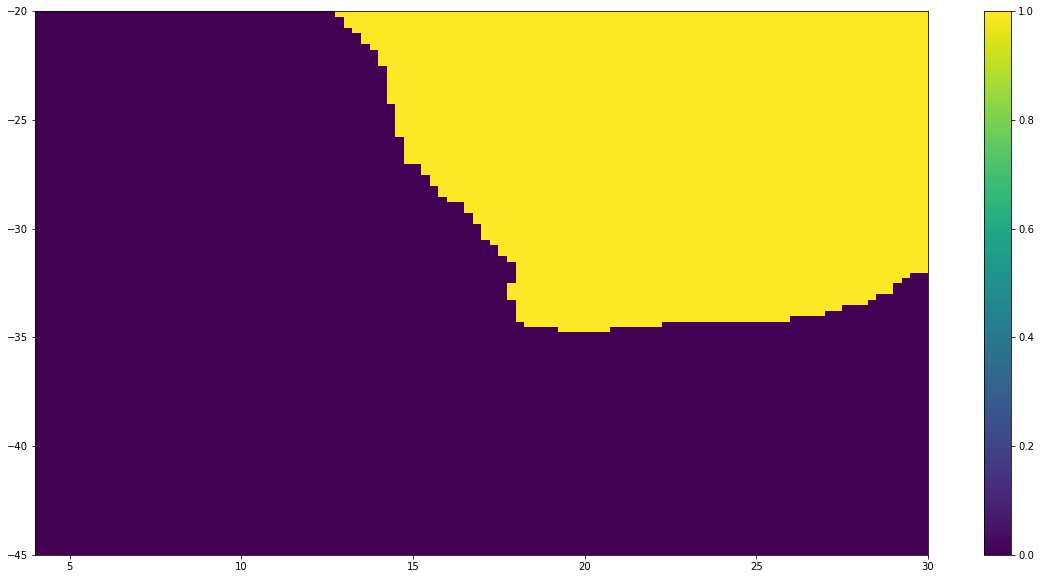

In [80]:
plt.figure(figsize=(20,10))
plt.pcolor(lon,lat,data) ; plt.colorbar()

In [81]:
#
# Create and write output netcdf file
#

fname_out = '/net/spica/local/tmp/3/gcambon/CONFIGS/BENGUELA_CPL/croco_files//DATA_ATMO_ERA5/landseamask_era5_benguela_cpl_OK.nc'

nw = netcdf(fname_out,mode='w',format='NETCDF4')

dimlon  = nw.createDimension('lon',  len(lon))
dimlat  = nw.createDimension('lat',  len(lat))

varlon = nw.createVariable('lon', 'f4',('lon',))
varlat = nw.createVariable('lat', 'f4',('lat',))
vardata = nw.createVariable('land', 'f4',('lat','lon'))
varlon.long_name = 'longitude of RHO-points'
varlat.long_name = 'latitude of RHO-points'
varlon.units = 'degree_east'
varlat.units = 'degree_north'
vardata.missing_value = 9999.
vardata.units = 'none 1-0'
vardata.long_name = 'land-sea mask'
	
varlon[:]=lon
varlat[:]=lat
vardata[:]=data
	
nw.close()